<a href="https://colab.research.google.com/github/JJungEEun/dacon/blob/main/%EC%86%8C%EB%93%9D%EC%98%88%EC%B8%A1%EA%B2%BD%EC%A7%84%EB%8C%80%ED%9A%8C/%EC%86%8C%EB%93%9D%EC%98%88%EC%B8%A1%EA%B2%BD%EC%A7%84%EB%8C%80%ED%9A%8C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 데이터 불러오기

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import patches
%matplotlib inline
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning) # FutureWarning 제거

In [ ]:
train = pd.read_csv("/content/drive/MyDrive/dacon/소득예측경진대회/data/train.csv")
test = pd.read_csv("/content/drive/MyDrive/dacon/소득예측경진대회/data/test.csv")

In [ ]:
train.head()

,id,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,target
0,0,32,Private,309513,Assoc-acdm,12,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
1,1,33,Private,205469,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
2,2,46,Private,149949,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
3,3,23,Private,193090,Bachelors,13,Never-married,Adm-clerical,Own-child,White,Female,0,0,30,United-States,<=50K
4,4,55,Private,60193,HS-grad,9,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,40,United-States,<=50K


id : 샘플 아이디

age : 나이

workclass : 일 유형

fnlwgt : CPS(Current Population Survey) 가중치

education : 교육수준

education.num : 교육수준 번호

marital.status : 결혼 상태

occupation : 직업

relationship : 가족관계

race : 인종

sex : 성별

capital.gain : 자본 이익

capital.loss : 자본 손실

hours.per.week : 주당 근무시간

native.country : 본 국적

target : 소득

### 데이터 살펴보기

#### 결측치 확인

In [ ]:
def check_missing_col(dataframe):
    missing_col = []
    for col in dataframe.columns:
        missing_values = sum(dataframe[col].isna())
        is_missing = True if missing_values >= 1 else False
        if is_missing:
            print(f'결측치가 있는 컬럼은: {col} 입니다')
            print(f'해당 컬럼에 총 {missing_values} 개의 결측치가 존재합니다.')
            missing_col.append([col, dataframe[col].dtype])
    if missing_col == []:
        print('결측치가 존재하지 않습니다')
    return missing_col

missing_col = check_missing_col(train)

결측치가 있는 컬럼은: workclass 입니다
해당 컬럼에 총 1836 개의 결측치가 존재합니다.
결측치가 있는 컬럼은: occupation 입니다
해당 컬럼에 총 1843 개의 결측치가 존재합니다.
결측치가 있는 컬럼은: native.country 입니다
해당 컬럼에 총 583 개의 결측치가 존재합니다.


In [ ]:
train[train.isna().sum(axis=1) > 0]

,id,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,target
15081,15081,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K
15082,15082,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,<=50K
15083,15083,41,Private,70037,Some-college,10,Never-married,Craft-repair,Unmarried,White,Male,0,3004,60,NaN,>50K
15084,15084,51,NaN,172175,Doctorate,16,Never-married,NaN,Not-in-family,White,Male,0,2824,40,United-States,>50K
15085,15085,22,Private,119592,Assoc-acdm,12,Never-married,Handlers-cleaners,Not-in-family,Black,Male,0,2824,40,NaN,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17475,17475,35,NaN,320084,Bachelors,13,Married-civ-spouse,NaN,Wife,White,Female,0,0,55,United-States,>50K
17476,17476,30,NaN,33811,Bachelors,13,Never-married,NaN,Not-in-family,Asian-Pac-Islander,Female,0,0,99,United-States,<=50K
17477,17477,71,NaN,287372,Doctorate,16,Married-civ-spouse,NaN,Husband,White,Male,0,0,10,United-States,>50K
17478,17478,41,NaN,202822,HS-grad,9,Separated,NaN,Not-in-family,Black,Female,0,0,32,United-States,<=50K


In [ ]:
print(train['workclass'].unique())
print(train['occupation'].unique())
print(train['native.country'].unique())

['Private' 'State-gov' 'Local-gov' 'Self-emp-not-inc' 'Self-emp-inc'
 'Federal-gov' 'Without-pay' nan 'Never-worked']
['Craft-repair' 'Exec-managerial' 'Adm-clerical' 'Prof-specialty'
 'Machine-op-inspct' 'Other-service' 'Sales' 'Farming-fishing'
 'Transport-moving' 'Handlers-cleaners' 'Tech-support' 'Protective-serv'
 'Priv-house-serv' 'Armed-Forces' nan]
['United-States' 'Poland' 'Mexico' 'Ireland' 'Guatemala'
 'Dominican-Republic' 'Greece' 'El-Salvador' 'Portugal' 'Canada'
 'Philippines' 'India' 'Italy' 'England' 'Jamaica' 'Columbia' 'South'
 'Vietnam' 'Cuba' 'Laos' 'Hong' 'Haiti' 'Germany' 'Yugoslavia' 'Ecuador'
 'France' 'Puerto-Rico' 'Outlying-US(Guam-USVI-etc)' 'Taiwan' 'China'
 'Japan' 'Honduras' 'Peru' 'Nicaragua' 'Hungary' 'Cambodia' 'Iran'
 'Trinadad&Tobago' 'Thailand' 'Scotland' 'Holand-Netherlands' nan]


해당 결측치는 Null값이다. (일유형, 직업, 국적)

1. 범주형 데이터: 최빈값
2. 일 유형, 직업: 나이,  교육 수준이 비슷한 사람들끼리 유사할 가능성 높음 -> 최빈값
3. 국적: ?
4. 데이터 제거도 고려

---

모든 데이터 값이 범주형이고 특별한 패턴이 보이지 않아 **결측치 제거**

In [ ]:
def handle_na(data, missing_col):
    temp = data.copy()
    for col, dtype in missing_col:
        if dtype == 'O':
            # 범주형 feature가 결측치인 경우 해당 행들을 삭제해 주었습니다.
            temp = temp.dropna(subset=[col])
    return temp

train = handle_na(train, missing_col)

# 결측치 처리가 잘 되었는지 확인해 줍니다.
missing_col = check_missing_col(train)     

결측치가 존재하지 않습니다


In [ ]:
train.shape

(15081, 16)

### EDA

#### 클래스 분포 **확인**

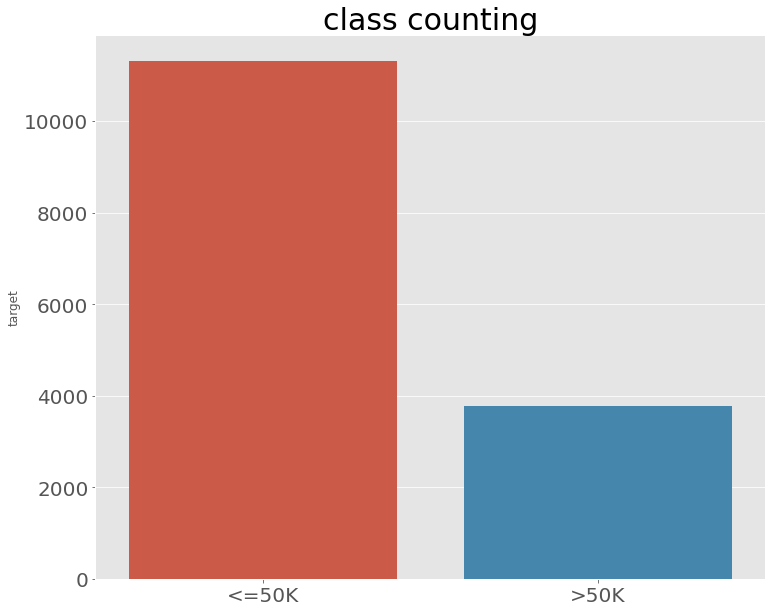

In [ ]:
counted_values = train['target'].value_counts()
plt.style.use('ggplot')
plt.figure(figsize=(12, 10))
plt.title('class counting', fontsize = 30)
value_bar_ax = sns.barplot(x=counted_values.index, y=counted_values)
value_bar_ax.tick_params(labelsize=20)

- 데이터 불균형 심한 편
- 3:1 비율

#### 범주형 데이터

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15081 entries, 0 to 15080
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              15081 non-null  int64 
 1   age             15081 non-null  int64 
 2   workclass       15081 non-null  object
 3   fnlwgt          15081 non-null  int64 
 4   education       15081 non-null  object
 5   education.num   15081 non-null  int64 
 6   marital.status  15081 non-null  object
 7   occupation      15081 non-null  object
 8   relationship    15081 non-null  object
 9   race            15081 non-null  object
 10  sex             15081 non-null  object
 11  capital.gain    15081 non-null  int64 
 12  capital.loss    15081 non-null  int64 
 13  hours.per.week  15081 non-null  int64 
 14  native.country  15081 non-null  object
 15  target          15081 non-null  object
dtypes: int64(7), object(9)
memory usage: 2.0+ MB


In [ ]:
train_categori = train.drop(['id', 'age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week'],axis = 1) #범주형이 아닌 피쳐 drop
train_categori.head()

,workclass,education,marital.status,occupation,relationship,race,sex,native.country,target
0,Private,Assoc-acdm,Married-civ-spouse,Craft-repair,Husband,White,Male,United-States,<=50K
1,Private,Some-college,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,>50K
2,Private,Some-college,Married-civ-spouse,Craft-repair,Husband,White,Male,United-States,<=50K
3,Private,Bachelors,Never-married,Adm-clerical,Own-child,White,Female,United-States,<=50K
4,Private,HS-grad,Divorced,Adm-clerical,Not-in-family,White,Female,United-States,<=50K


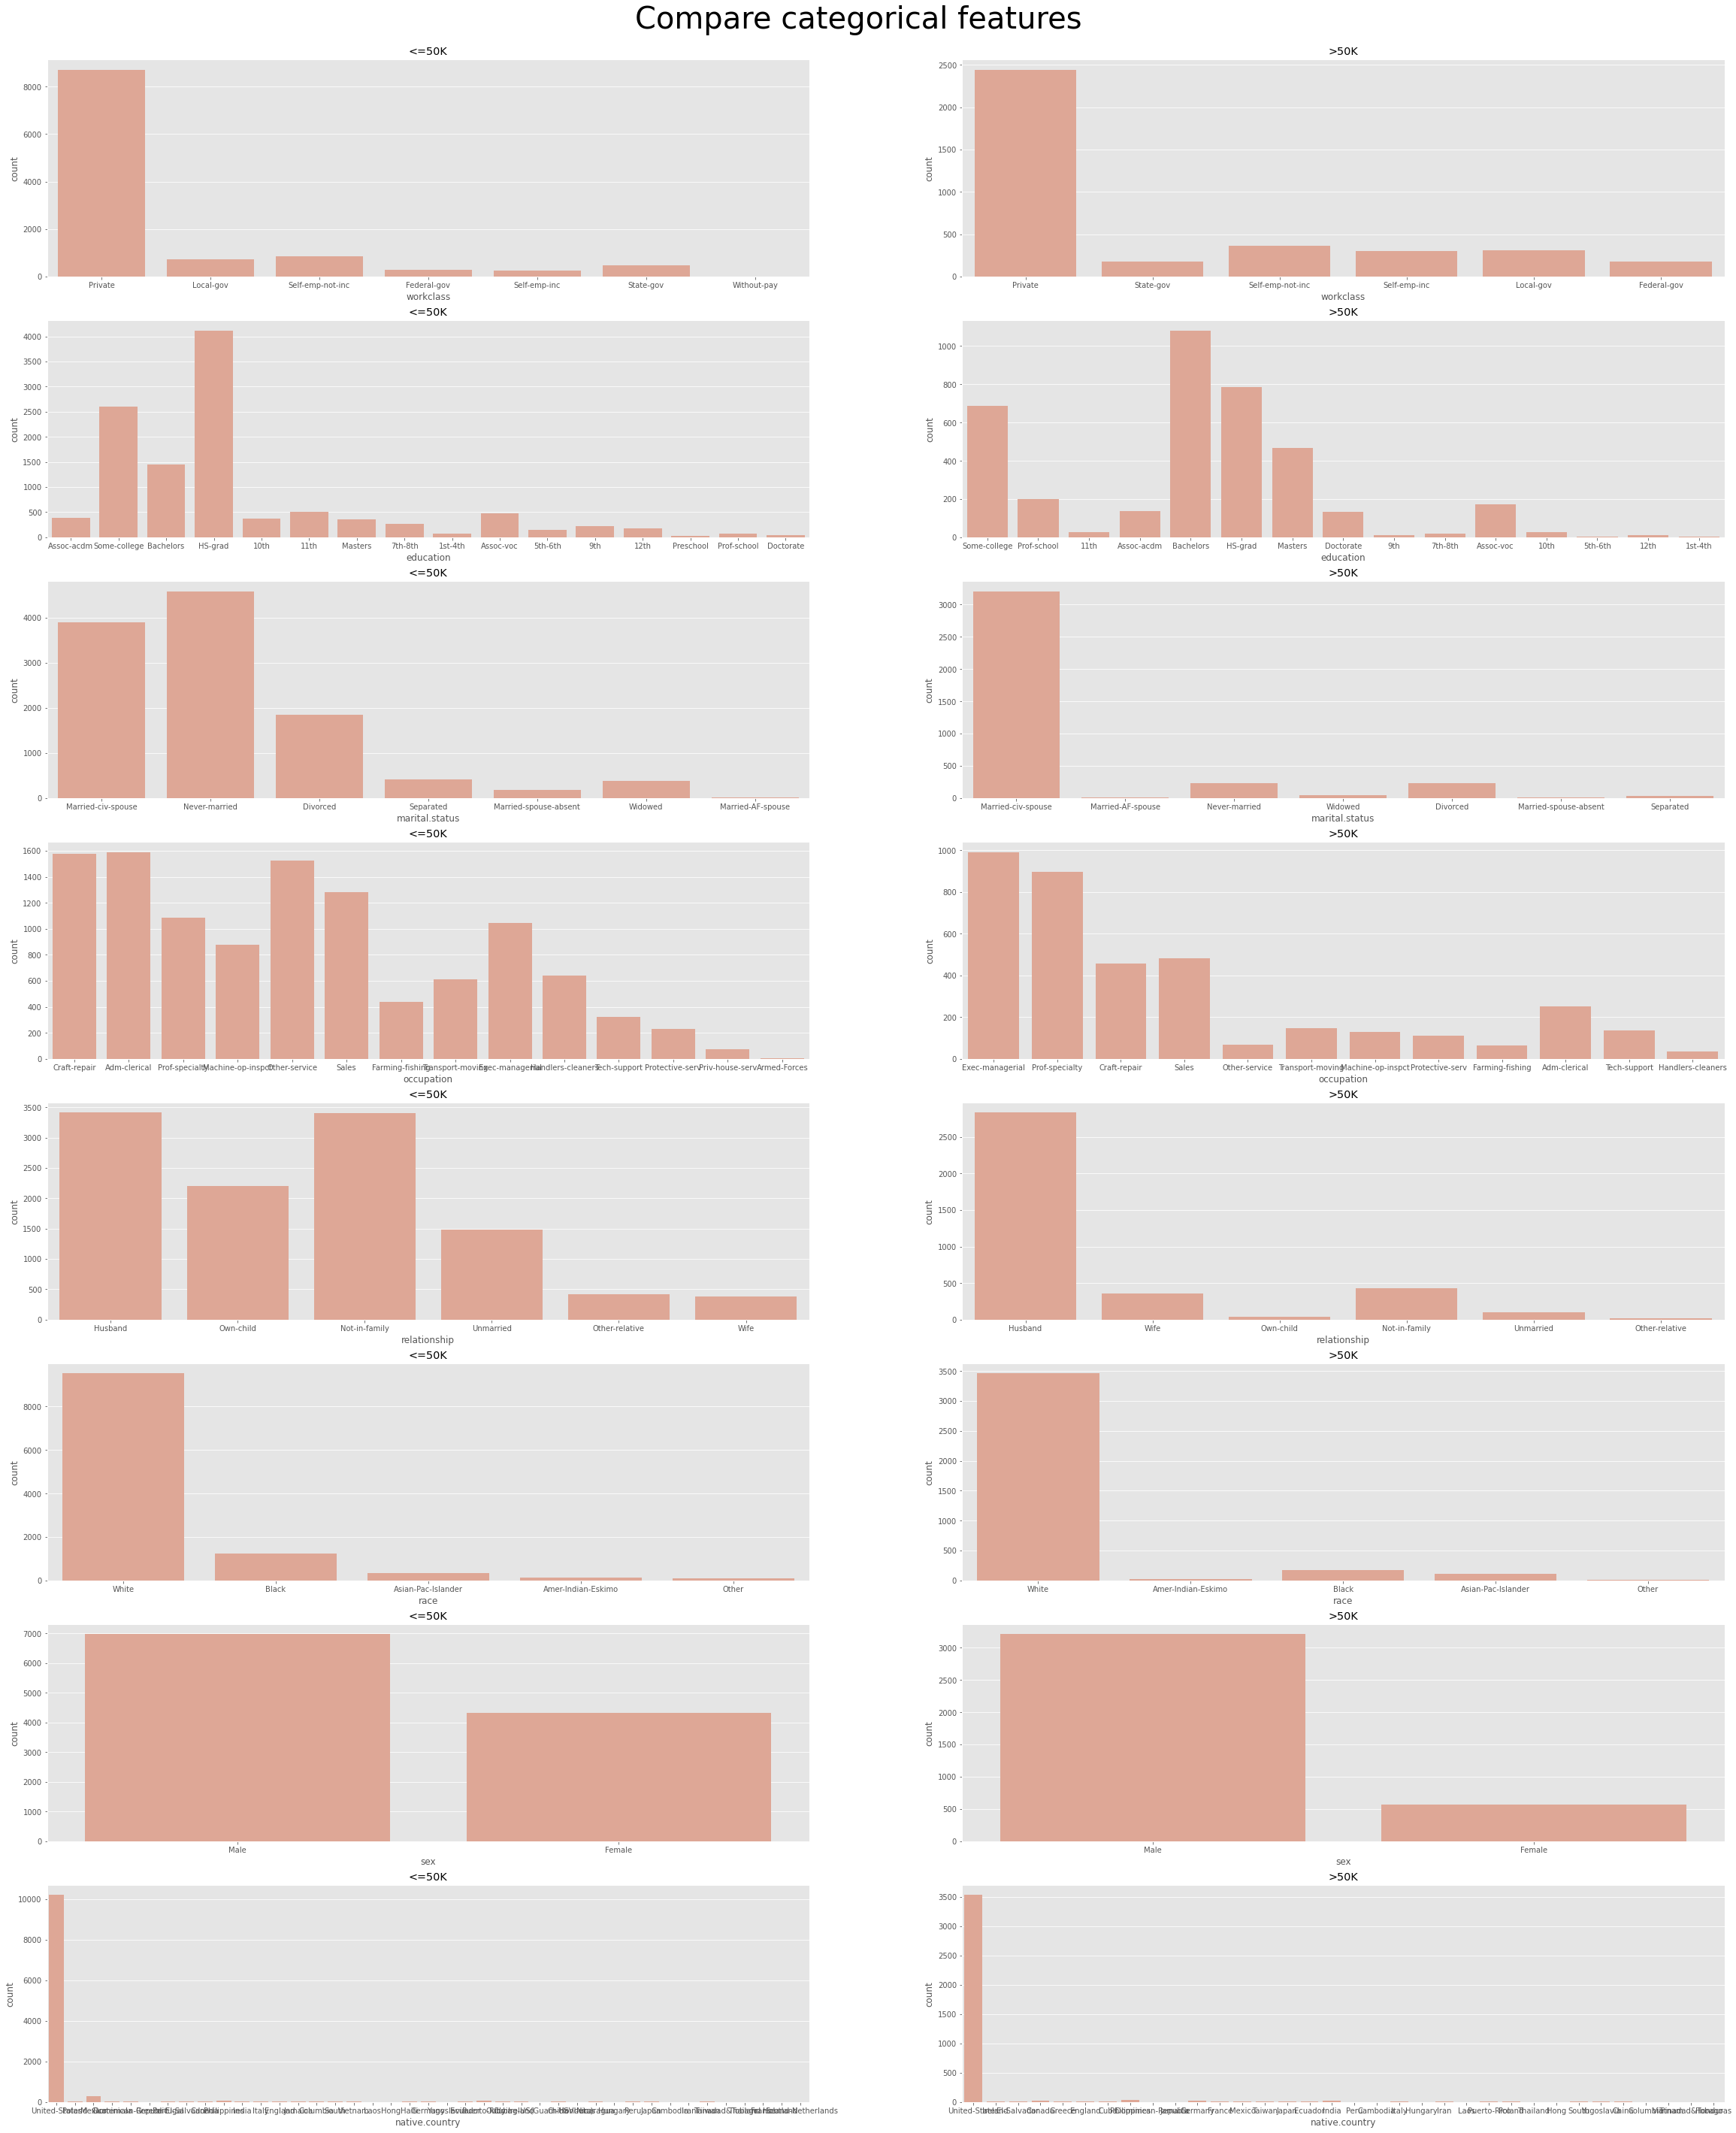

In [ ]:
# 범주형 데이터 분포 
def visualize(axx, field, num): ##그래프를 그리기 위한 메소드
    sns.countplot(train_categori.columns[num], data= train_categori[train_categori['target'] == field],  color='#eaa18a', ax = axx) # countplot을 이용하여 그래프를 그려줍니다.
    axx.set_title(field)

figure, ((ax1,ax2),(ax3,ax4), (ax5, ax6),(ax7, ax8), (ax9, ax10),
         (ax11,ax12),(ax13,ax14), (ax15, ax16))  = plt.subplots(nrows=8, ncols=2) ## 원하는 개수의 subplots 만들어주기
figure.set_size_inches(40, 50) #(w,h)
figure.suptitle('Compare categorical features', fontsize=40, y = 0.9)

k = 0 # 피쳐 수
j = 1 # 그래프 수
while k<8: 
    for i in range(0,2):
        visualize(eval(f'ax{j}'), train_categori['target'].unique()[i], k)
        j = j+1
    k = k+1

- workclass
  + 대부분 사기업 종사자
- education
  + 50k 이하: 고졸, 전문대, 학사 순
  + 50k 이상: 학사, 고졸, 전문대 순
- marital status(결혼 상태)
  + 50k 이히: 미혼, 기혼, 이혼 순
  + 50k 이상: 기혼, 이혼, 미혼 순
- ocuuoation
  + 50k 이하: Adm-clerical / Craft-repair / Other Service
  + 50k 이상: Exec-managerial / Prof-specialty / Sales
- sex
  + 50k 이하: Male(약 7,000) / Female (약 4,500
  + 50k 이상:  Male(약 3,300) / Female (약 500)


#### 수치형 데이터

In [ ]:
train_numeric = train[['age', 'fnlwgt', 'capital.gain', 'capital.loss', 'hours.per.week', 'target']] #수치형 피쳐와 label인 target 추출
train_numeric.describe()

,age,fnlwgt,capital.gain,capital.loss,hours.per.week
count,15081.000000,1.508100e+04,15081.000000,15081.000000,15081.000000
mean,38.455673,1.897891e+05,1105.202772,85.466415,40.920828
std,13.158095,1.051112e+05,7489.760601,397.661418,12.018513
min,17.000000,1.882700e+04,0.000000,0.000000,1.000000
25%,28.000000,1.177460e+05,0.000000,0.000000,40.000000
50%,37.000000,1.782510e+05,0.000000,0.000000,40.000000
75%,47.000000,2.381880e+05,0.000000,0.000000,45.000000
max,90.000000,1.455435e+06,99999.000000,4356.000000,99.000000


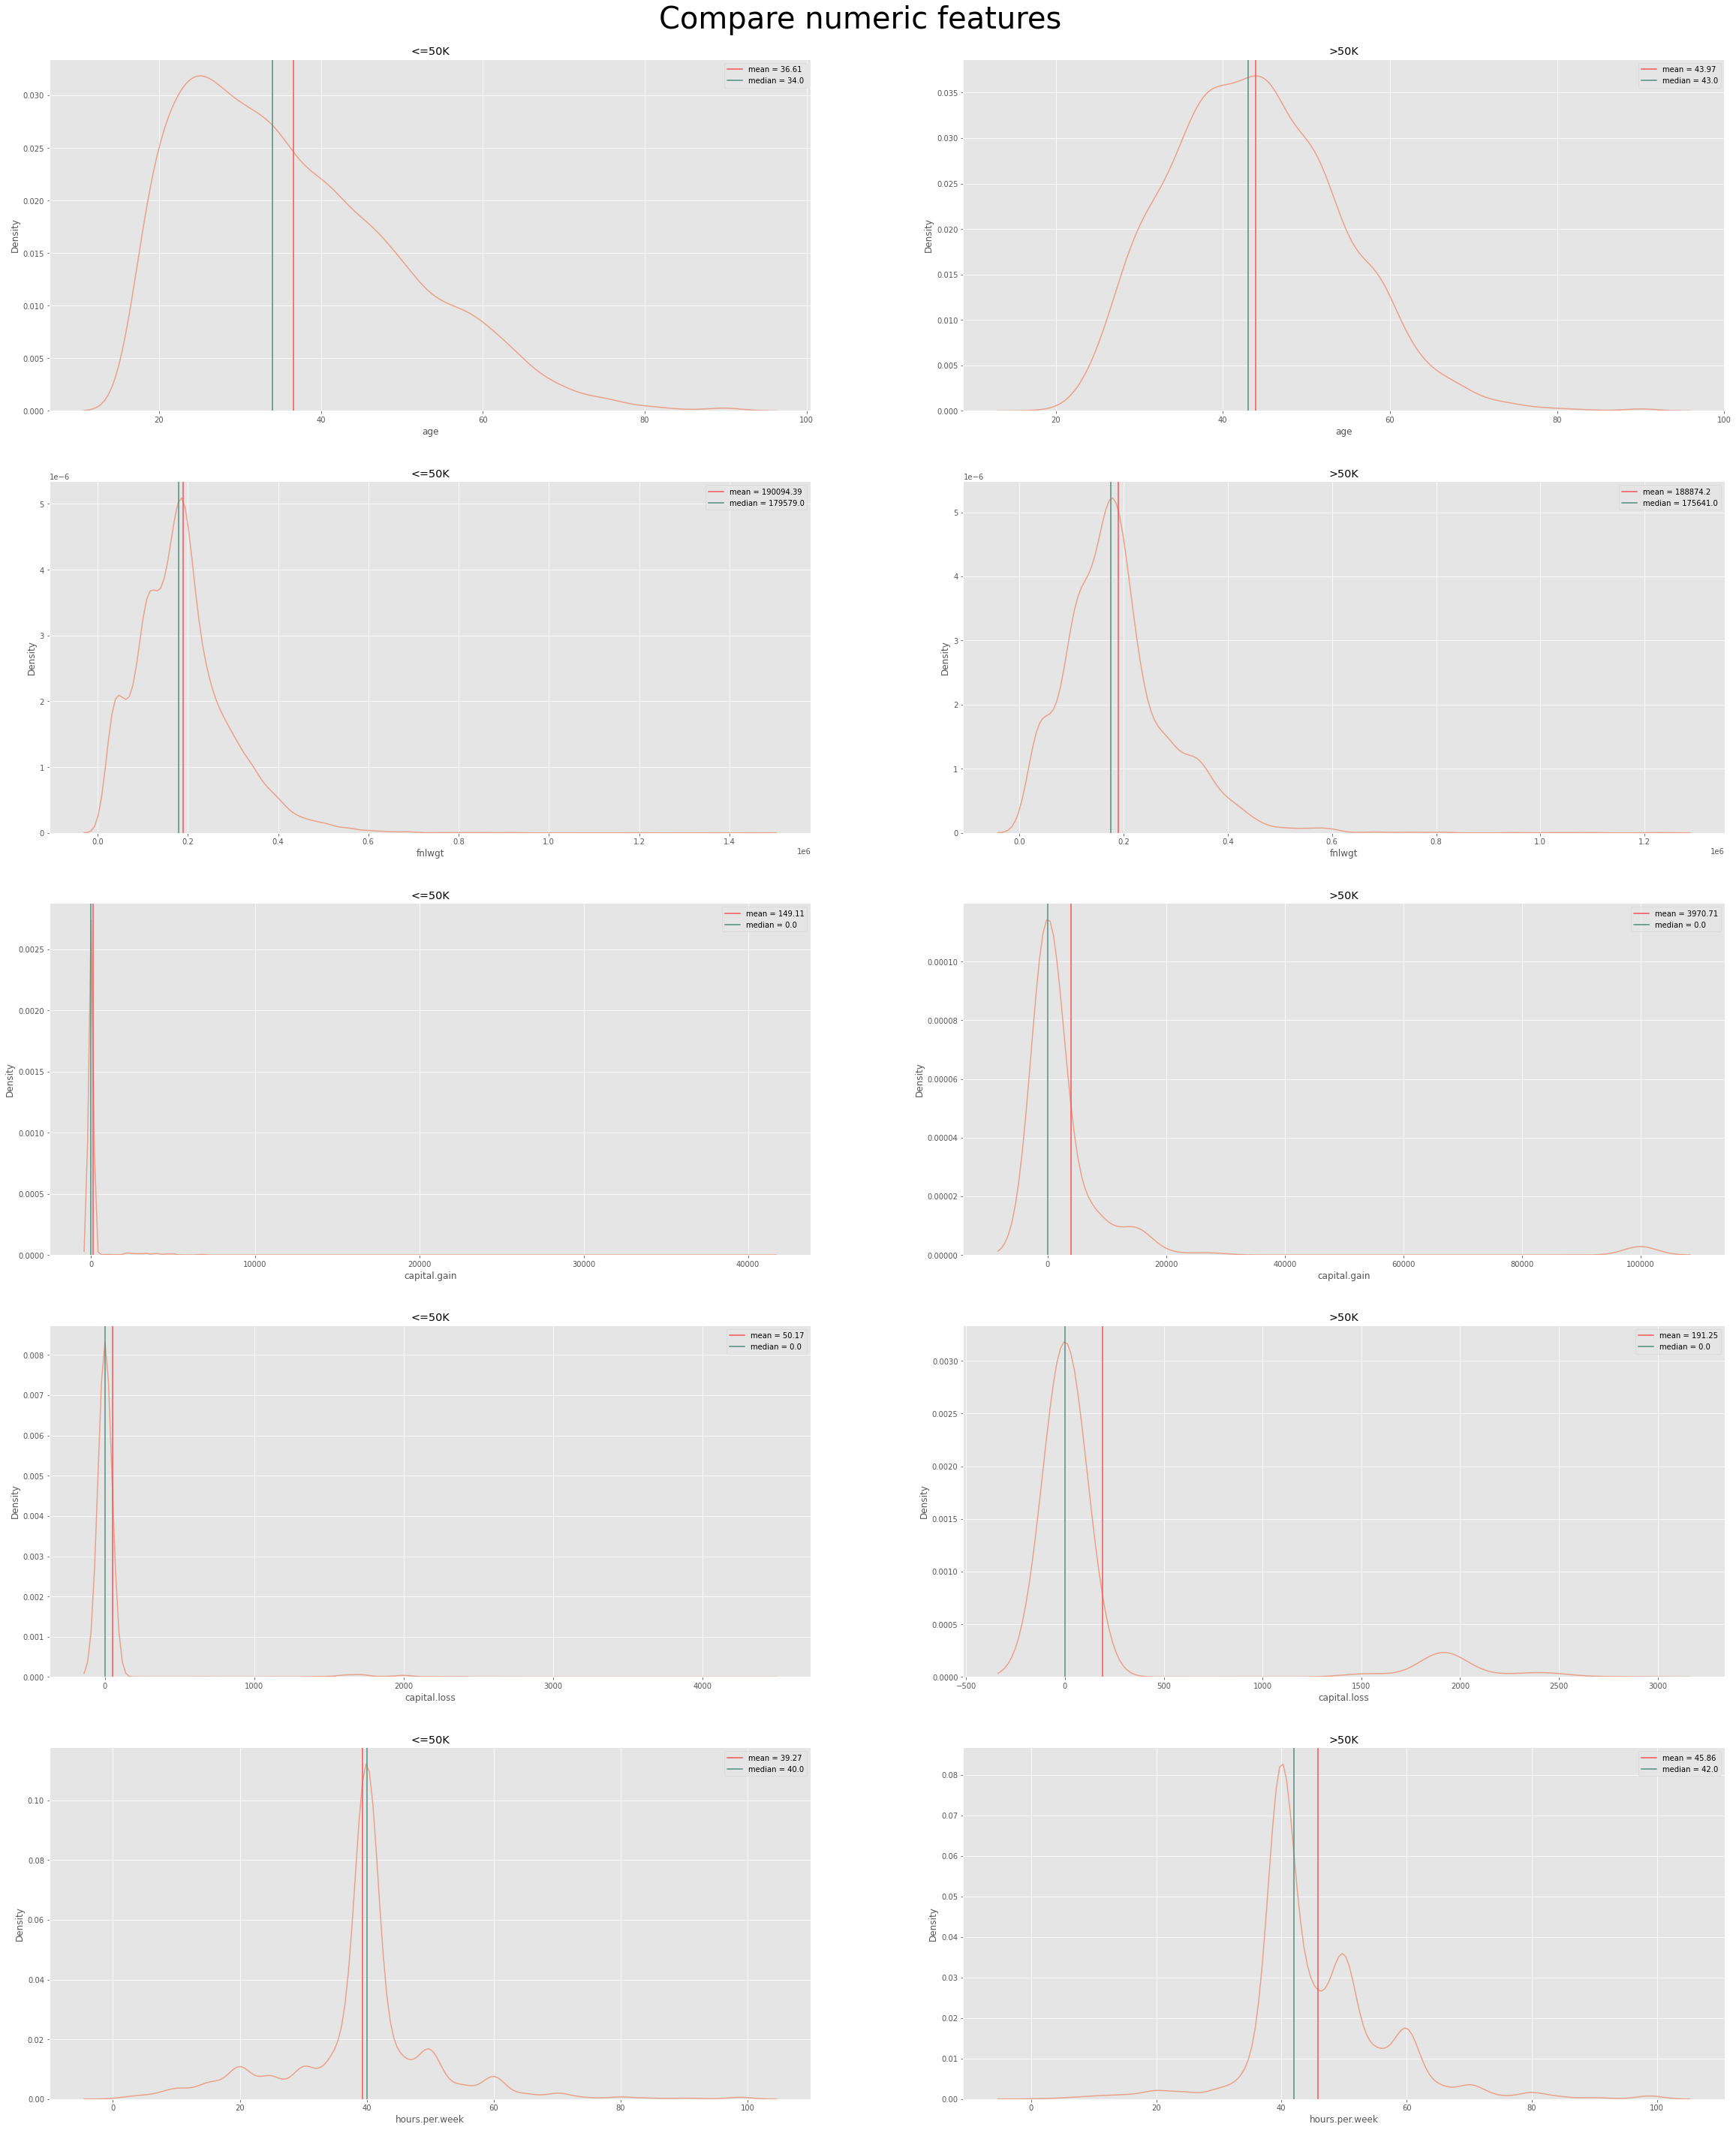

In [ ]:
def visualize(axx, field, num):
    line = train_numeric[train_numeric['target'] == field] #메소드에서 target 클래스 추춣
    name = train_numeric[train_numeric['target'] == field][train_numeric.columns[num]].name #메소드에서 이름 추출
    sns.kdeplot(x = line[train_numeric.columns[num]],  data = train_numeric, ax = axx, color='#eaa18a') #countplot을 이용하여 그래프를 그려줍니다.
    axx.axvline(line.describe()[name]['mean'], c='#f55354', label = f"mean = {round(line.describe()[name]['mean'], 2)}") #mean 통계값을 표기해줍니다.
    axx.axvline(line.describe()[name]['50%'], c='#518d7d', label = f"median = {round(line.describe()[name]['50%'], 2)}") #median 통계값을 표기해줍니다.
    axx.legend()
    axx.set_title(field)

figure, ((ax1,ax2),(ax3,ax4), (ax5, ax6),(ax7, ax8), (ax9, ax10))  = plt.subplots(nrows=5, ncols=2) ##원하는 개수의 subplots 만들어주기
figure.set_size_inches(40, 50) #(w,h)
figure.suptitle('Compare numeric features', fontsize=40, y = 0.9)

k = 0 # 피쳐 수
j = 1 # 그래프 수
while k<5:
    for i in range(0,2):
        visualize(eval(f'ax{j}'), train_numeric['target'].unique()[i], k)
        j = j+1
    k = k+1

- age
  + 50k이상보다 50k이하가 나이가 더 많음
- hours.per.week
  + 50k 이상: 비교적 높은 주당 업무시간 수요
  + 40시간을 기준
- mean값을 보면 capital.gain, capital.loss, hours.per.week이 50k에서 더 높은 수치를 가지고 있음

---
- **age, capital.gain, capital.loss, hours.per.week**

### 상관관계


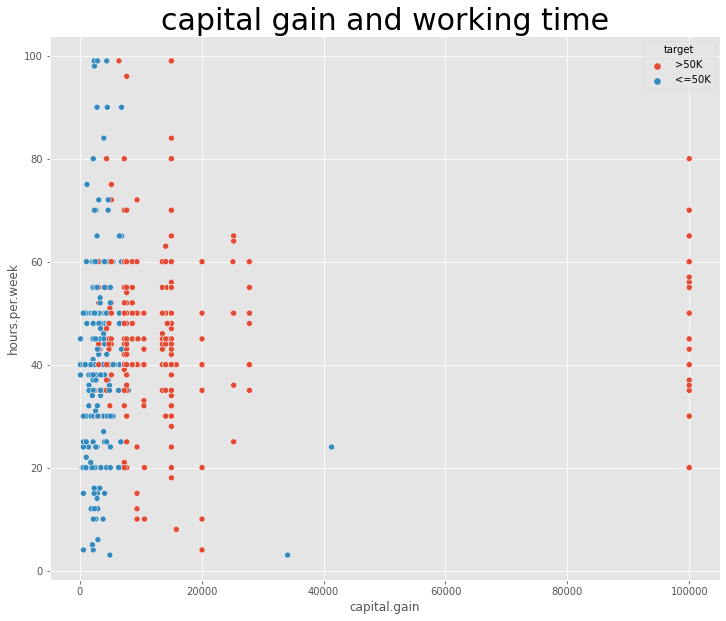

In [ ]:
plt.style.use('ggplot')
plt.figure(figsize=(12, 10))
plt.title('capital gain and working time', fontsize = 30)
sns.scatterplot(x = 'capital.gain',  y= 'hours.per.week', hue= 'target', data= train[train['capital.gain'] > 0]) #산포도를 확실하게 차이나도록  시각화 해주기 위하여 capital.gain에서 0값을 제외

- capital.gain이 커질 수록 50k이상이 많음
- 비교적 hours.per.week.가 작을 수록 50k 이하 많음
- **근무 시간이 많고 자본의 이익이 많은 집합일수록 수입이 많음**

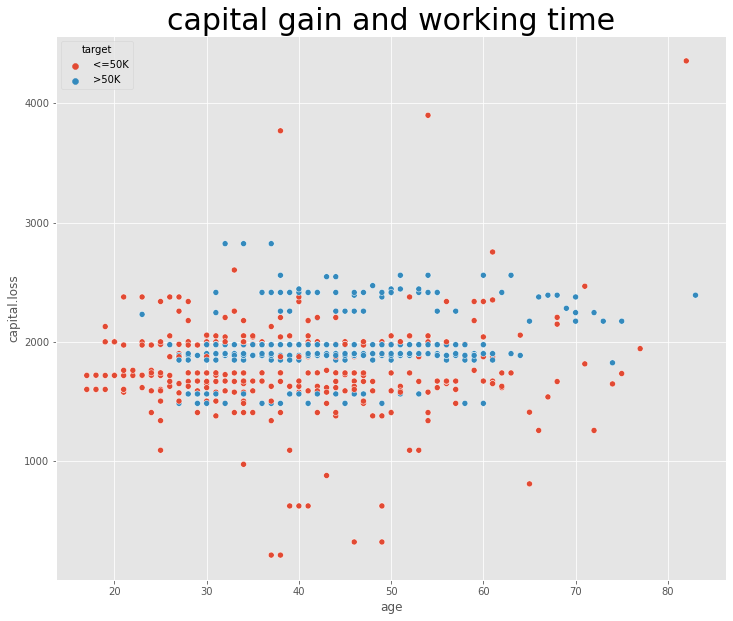

In [ ]:
plt.style.use('ggplot')
plt.figure(figsize=(12, 10))
plt.title('capital gain and working time', fontsize = 30)
sns.scatterplot(x = 'age',  y= 'capital.loss', hue= 'target', data= train[train['capital.loss'] > 0]) #산포도를 확실하게 차이나도록  시각화 해주기 위하여 capital.loss에서 0값을 제외

- age가 25미만 / 65세 이상: 50k 이상
- capital.loss 적은 곳: 50k 이상
- **25-65세 사이 자본의 손실이 많은 집합이 수익이 많을 것**


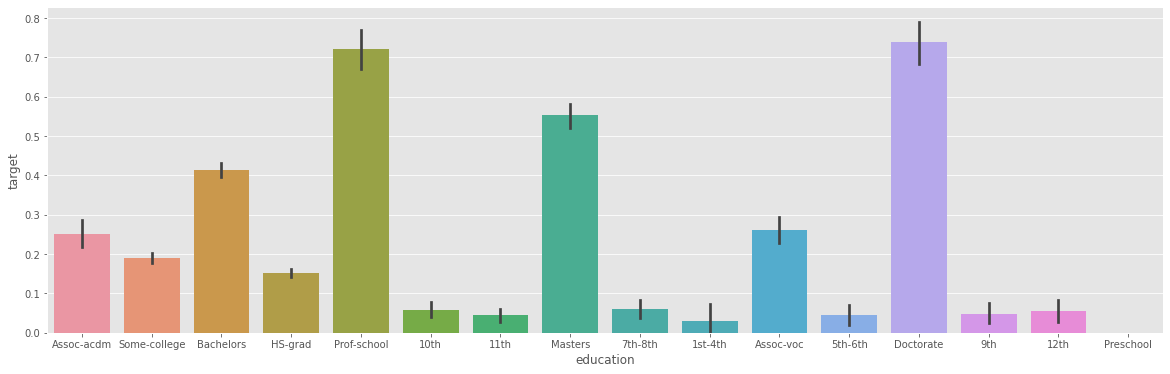

In [ ]:
plt.figure(figsize=(20,6))
sns.barplot(x= train['education'], y= train["target"])

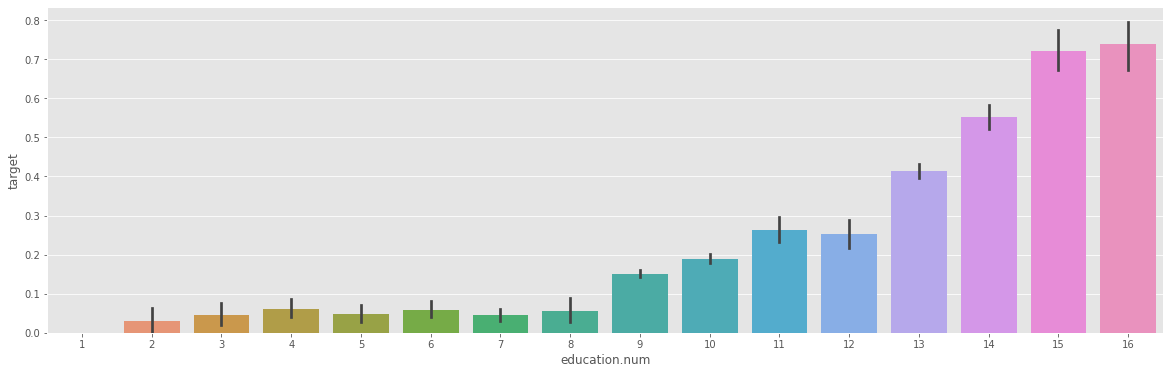

In [ ]:
plt.figure(figsize=(20,6))
sns.barplot(x= train['education.num'], y= train["target"])

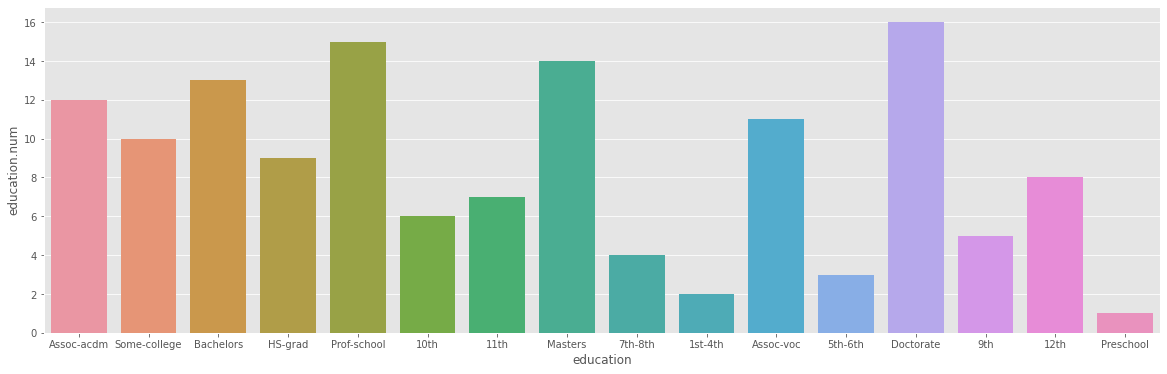

In [ ]:
plt.figure(figsize=(20,6))
sns.barplot(x= train['education'], y= train["education.num"])

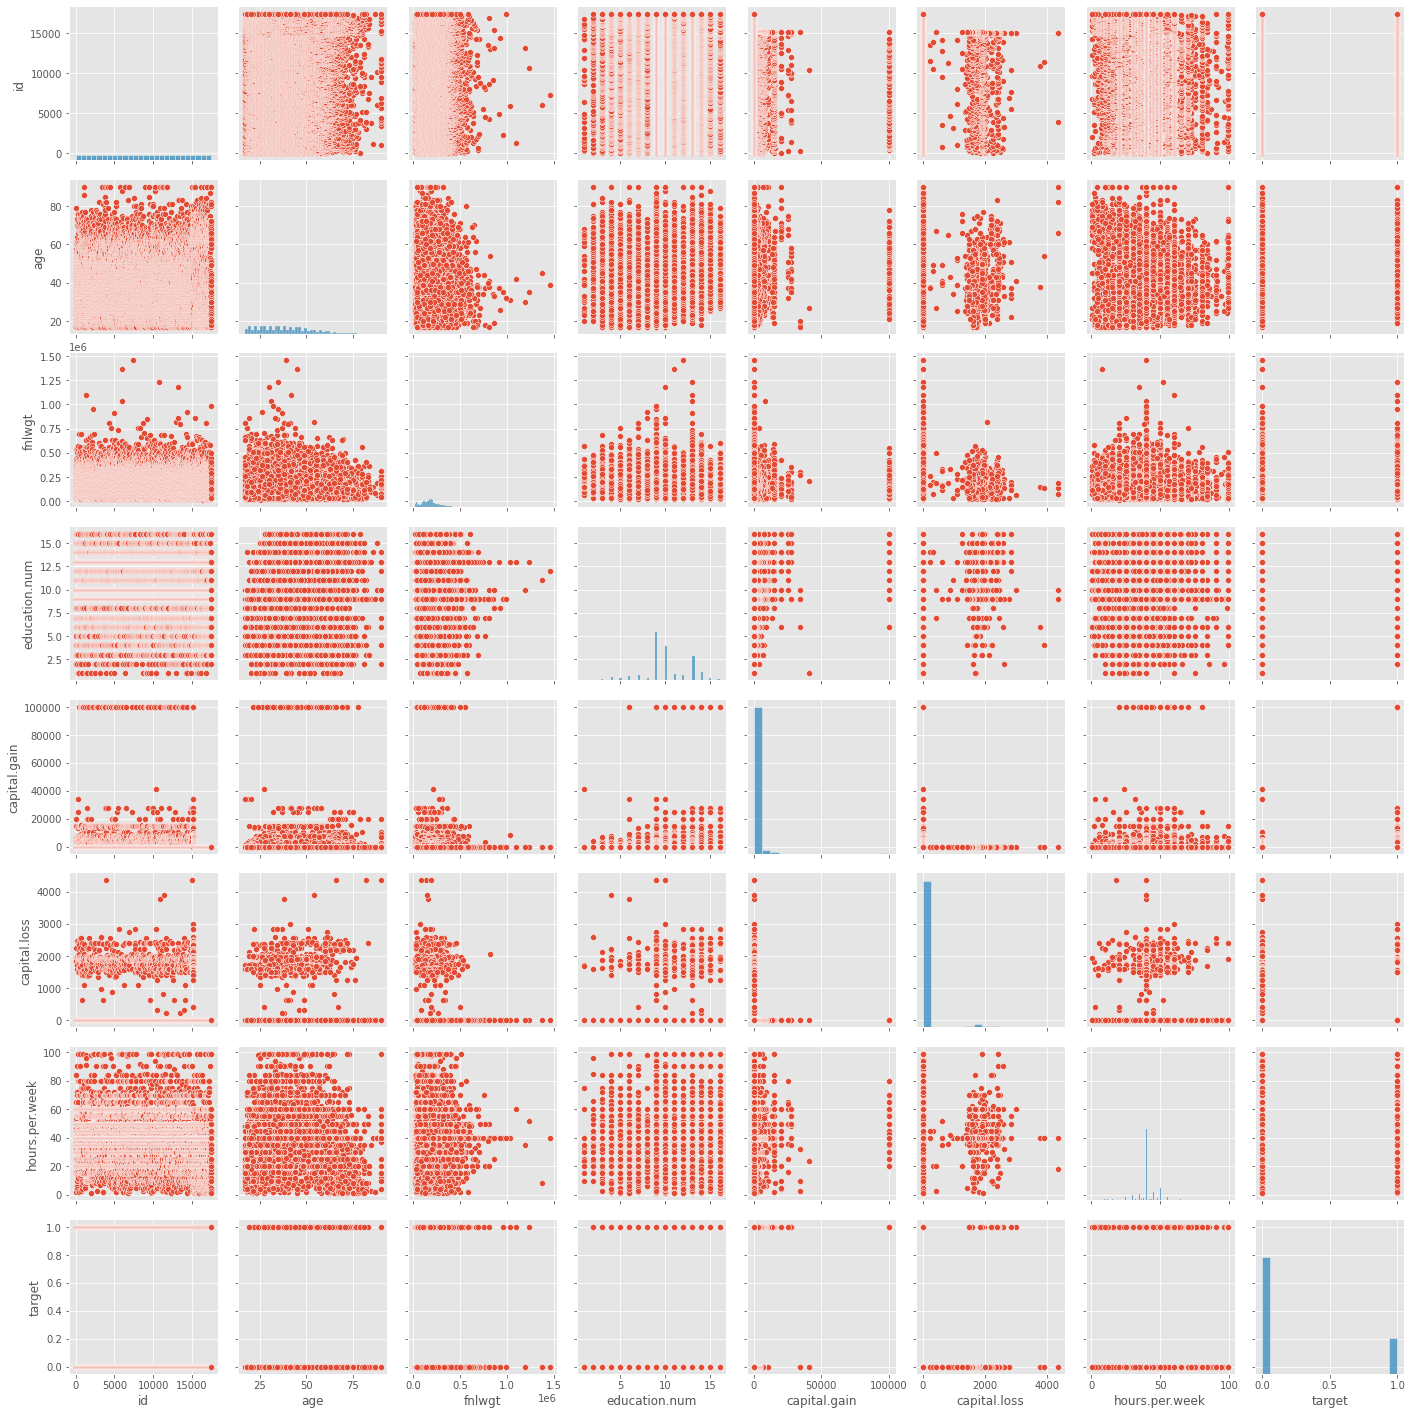

In [ ]:
sns.pairplot(train)

수치형 변수간 상관도 낮음 

In [ ]:
train.corr().loc["target"].abs().sort_values(ascending=False)

target            1.000000
marital.status    0.427823
relationship      0.362184
education.num     0.339855
new3              0.329430
age_group         0.238832
hours.per.week    0.236090
capital.gain      0.225092
net_cap           0.216243
new1              0.216243
sex               0.214564
occupation        0.156190
capital.loss      0.153856
race              0.073000
id                0.059160
workclass         0.013339
education         0.007867
fnlwgt            0.006451
native.country    0.002118
Name: target, dtype: float64

In [ ]:
train['new1'] = train['capital.gain'] - train['capital.loss']
train['new2'] = train['age'] * train['hours.per.week']

In [ ]:
def family(data):
  data['relationship'] = data['relationship'].replace(['Husband', 'Wife'], 'Spouse')

In [ ]:
family(train)

In [ ]:
def married(data):
  data['marital.status'] = data['marital.status'].replace(['Never-married','Divorced','Widowed','Separated'], 'alone')
  data['marital.status'] = data['marital.status'].replace(['Married-civ-spouse','Married-spouse-absent','Married-AF-spouse'], 'not alone')
  data['marital.status']= data['marital.status'].map({'not alone':1,'alone':0})

In [ ]:
married(train)

In [ ]:
train['target']=train['target'].map({'<=50K':0,'>50K':1})

In [ ]:
native_country_table = train['native.country'].value_counts()
native_country_table

United-States                 15393
Mexico                          355
Philippines                     108
Germany                          75
Canada                           63
Puerto-Rico                      59
El-Salvador                      58
Cuba                             49
India                            47
England                          46
Jamaica                          42
China                            40
South                            39
Italy                            38
Dominican-Republic               38
Columbia                         37
Guatemala                        36
Poland                           35
Japan                            33
Vietnam                          32
Taiwan                           28
Haiti                            23
Nicaragua                        20
Portugal                         20
Ecuador                          19
Ireland                          18
Iran                             17
Peru                        

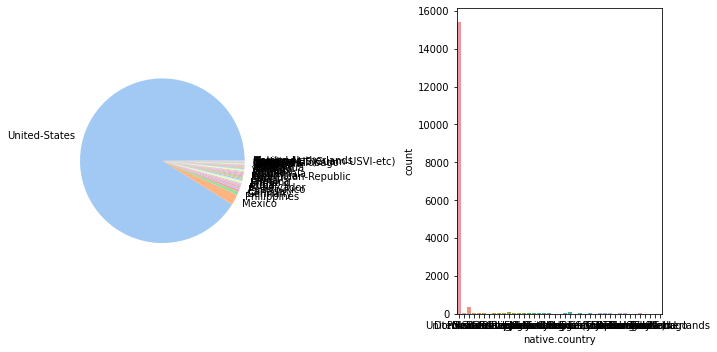

In [ ]:
colors = sns.color_palette('pastel')[0:42]
#create pie chart
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.pie(train['native.country'].value_counts(),labels=native_country_table.index,colors=colors)
plt.subplot(1,2,2)
sns.countplot(data=train, x="native.country")


#sns.countplot(data=train, x="native.country")
plt.tight_layout()
plt.show()

In [ ]:
from scipy.stats import chi2_contingency

country_crosstab=pd.crosstab(train['native.country'],train['target'])
country_crossgtab_res=chi2_contingency(country_crosstab)

In [ ]:
print('Chi2 Statistic: {}, p-value: {}'.format(country_crossgtab_res[0], country_crossgtab_res[1]))
print('기각')

Chi2 Statistic: 198.0845348336186, p-value: 8.189153114434088e-23
기각


In [ ]:
group1=[]
group2=[]
group3=[]
group4=[]

for country in train['native.country'].unique():
    country_data=train[train['native.country']==country]['target']
    probs=sum(country_data)/country_data.count()
    if probs >=0.5:
        group1.append(country)
    elif probs < 0.5 and probs >=0.3:
        group2.append(country)
    elif probs < 0.3 and probs >=0.1:
        group3.append(country)
    else:
        group4.append(country)
    #print(country,probs)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in long_scalars
  


In [ ]:
print('group1 :',group1)
print()
print('group2 :',group2)
print()
print('group3 :',group3)
print()
print('group4 :',group4)

group1 : ['Iran']

group2 : ['Greece', 'Canada', 'Philippines', 'India', 'Italy', 'England', 'Germany', 'Yugoslavia', 'France', 'Taiwan', 'Japan', 'Cambodia']

group3 : ['United-States', 'Poland', 'Ireland', 'El-Salvador', 'South', 'Cuba', 'Laos', 'Hong', 'Ecuador', 'China', 'Honduras', 'Peru', 'Hungary', 'Trinadad&Tobago', 'Thailand']

group4 : ['Mexico', 'Guatemala', 'Dominican-Republic', 'Portugal', 'Jamaica', 'Columbia', 'Vietnam', 'Haiti', 'Puerto-Rico', 'Outlying-US(Guam-USVI-etc)', 'Nicaragua', 'Scotland', 'Holand-Netherlands']


In [ ]:
def grouping(data):
  group1=[]
  group2=[]
  group3=[]
  group4=[]

  for country in train['native.country'].unique():
    country_data=train[train['native.country']==country]['target']
    probs=sum(country_data)/country_data.count()
    if probs >=0.5:
        group1.append(country)
    elif probs < 0.5 and probs >=0.3:
        group2.append(country)
    elif probs < 0.3 and probs >=0.1:
        group3.append(country)
    else:
        group4.append(country)
    #print(country,probs)

  data['native.country']=data['native.country'].replace(group1, 1)
  data['native.country']=data['native.country'].replace(group2, 2)
  data['native.country']=data['native.country'].replace(group3, 3)
  data['native.country']=data['native.country'].replace(group4, 4)

In [ ]:
train

,id,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,target,new1,new3,net_cap,age_group,age_bin
0,0,0,309513,0,12,1,0,0,0,0,0,0,40,3,0,0,1280,0,1,3
1,1,0,205469,1,10,1,1,0,0,0,0,0,40,3,1,0,1320,0,1,3
2,2,0,149949,1,10,1,0,0,0,0,0,0,40,3,0,0,1840,0,1,4
3,3,0,193090,2,13,0,2,1,0,1,0,0,30,3,0,0,690,0,0,1
4,4,0,60193,3,9,0,2,2,0,1,0,0,40,3,0,0,2200,0,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15076,15076,0,337286,7,14,0,1,2,2,0,0,0,40,3,0,0,1400,0,1,3
15077,15077,0,182074,1,10,0,2,2,0,0,0,0,45,3,0,0,1620,0,1,3
15078,15078,4,175070,4,15,1,3,0,0,0,0,0,45,3,1,0,2250,0,1,5
15079,15079,0,202937,1,10,0,10,2,0,1,0,0,40,3,0,0,1560,0,1,3


In [ ]:
grouping(train)

In [ ]:
import numpy as np

In [ ]:
def grouping2(data):
  #age 가공 및 범주형 변환

  data['age']=np.log(data['age'])# log로 
  data['age_group']=0

  data.loc[(data['age']>3.25)& (data['age']<4.1),'age_group']=1
  
  data['age_bin']=pd.cut(data['age'],8,labels=[0,1,2,3,4,5,6,7])


  #그리고 age drop
  data.drop('age',axis=1,inplace=True)

In [ ]:
grouping2(train)
train

,id,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,target,new1,new3,net_cap,age_group,age_bin
0,0,Private,309513,Assoc-acdm,12,1,Craft-repair,Spouse,White,Male,0,0,40,3,0,0,1280,0,1,3
1,1,Private,205469,Some-college,10,1,Exec-managerial,Spouse,White,Male,0,0,40,3,1,0,1320,0,1,3
2,2,Private,149949,Some-college,10,1,Craft-repair,Spouse,White,Male,0,0,40,3,0,0,1840,0,1,4
3,3,Private,193090,Bachelors,13,0,Adm-clerical,Own-child,White,Female,0,0,30,3,0,0,690,0,0,1
4,4,Private,60193,HS-grad,9,0,Adm-clerical,Not-in-family,White,Female,0,0,40,3,0,0,2200,0,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17475,17475,NaN,320084,Bachelors,13,1,NaN,Spouse,White,Female,0,0,55,3,1,0,1925,0,1,3
17476,17476,NaN,33811,Bachelors,13,0,NaN,Not-in-family,Asian-Pac-Islander,Female,0,0,99,3,0,0,2970,0,1,2
17477,17477,NaN,287372,Doctorate,16,1,NaN,Spouse,White,Male,0,0,10,3,1,0,710,0,0,6
17478,17478,NaN,202822,HS-grad,9,0,NaN,Not-in-family,Black,Female,0,0,32,3,0,0,1312,0,1,4


### 모델링

#### 라벨 인코딩

In [ ]:
#라벨인코딩을 하기 위함 dictionary map 생성 함수
def make_label_map(dataframe):
    label_maps = {}
    for col in dataframe.columns:
        if dataframe[col].dtype=='object':
            label_map = {'unknown':0}
            for i, key in enumerate(dataframe[col].unique()):
                label_map[key] = i  #새로 등장하는 유니크 값들에 대해 1부터 1씩 증가시켜 키값을 부여해줍니다.
            label_maps[col] = label_map
    return label_maps

# 각 범주형 변수에 인코딩 값을 부여하는 함수
def label_encoder(dataframe, label_map):
    for col in dataframe.columns:
        if dataframe[col].dtype=='object':
            dataframe[col] = dataframe[col].map(label_map[col])
            #dataframe[col] = dataframe[col].fillna(label_map[col]['unknown']) #혹시 모를 결측값은 unknown의 값(0)으로 채워줍니다.
    return dataframe

train = label_encoder(train, make_label_map(train))

In [ ]:
def preprocessing_train(df):

    
    # 일 유형별 교육수준, 순자본이익 평균 계산
    # wc_cnt = df[['workclass', 'education.num', 'net_cap']]
    # wc_cnt = wc_cnt.groupby('workclass').mean()
    
    # # 결측치 일괄 제거
    # df.dropna(inplace=True, axis=0)
    
    # 불용 columns 제거
    df.drop(['id','fnlwgt'], inplace=True, axis=1)

    # # columns 순서 변경
    # df = df[['age', 'workclass', 'fnlwgt', 'education', 'education.num',
    #    'marital.status', 'occupation', 'relationship', 'race', 'sex',
    #    'hours.per.week', 'native.country', 'net_cap', 'target']]

    return df

def preprocessing_test(df):
    # 순자본이익 컬럼 생성
    # df['net_cap'] = df['capital.gain'] - df['capital.loss']
    
    # 일 유형별 교육수준, 순자본이익 평균 계산
    # wc_cnt = df[['workclass', 'education.num', 'net_cap']]
    # wc_cnt = wc_cnt.groupby('workclass').mean()
    
    # 결측치 일괄 제거
    df.dropna(inplace=True, axis=0)
    
    # 불용 columns 제거
    df.drop(['id', 'fnlwgt'], inplace=True, axis=1)


    return df

In [ ]:
preprocessing_train(train)

,workclass,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,target,new1,new3,net_cap,age_group,age_bin
0,0,0,12,1,0,0,0,0,0,0,40,3,0,0,1280,0,1,3
1,0,1,10,1,1,0,0,0,0,0,40,3,1,0,1320,0,1,3
2,0,1,10,1,0,0,0,0,0,0,40,3,0,0,1840,0,1,4
3,0,2,13,0,2,1,0,1,0,0,30,3,0,0,690,0,0,1
4,0,3,9,0,2,2,0,1,0,0,40,3,0,0,2200,0,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17475,7,2,13,1,14,0,0,1,0,0,55,3,1,0,1925,0,1,3
17476,7,2,13,0,14,2,2,1,0,0,99,3,0,0,2970,0,1,2
17477,7,12,16,1,14,0,0,0,0,0,10,3,1,0,710,0,0,6
17478,7,3,9,0,14,2,1,1,0,0,32,3,0,0,1312,0,1,4


In [ ]:
def new(data):
  data['new1'] = data['capital.gain'] - data['capital.loss']
  data['new3']  =   data['age'] * data['hours.per.week']
  data['relationship'] = data['relationship'].replace(['Husband', 'Wife'], 'Spouse')
  data['marital.status'] = data['marital.status'].replace(['Never-married','Divorced','Widowed','Separated'], 'alone')
  data['marital.status'] = data['marital.status'].replace(['Married-civ-spouse','Married-spouse-absent','Married-AF-spouse'], 'not alone')
  data['marital.status']= data['marital.status'].map({'not alone':1,'alone':0})
  data['net_cap'] = data['capital.gain'] - data['capital.loss']

In [ ]:
new(train)

In [ ]:
new(test)

In [ ]:
grouping(test)

In [ ]:
grouping2(test)

In [ ]:
preprocessing_test(test)

,workclass,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,new1,new3,net_cap,age_group,age_bin
0,Private,Some-college,10,1,Exec-managerial,Spouse,White,Male,0,0,45,United-States,0,2115,0,1,age4
1,Self-emp-inc,Some-college,10,0,Sales,Not-in-family,White,Male,0,0,75,United-States,0,2550,0,1,age3
2,Local-gov,Bachelors,13,0,Craft-repair,Not-in-family,White,Male,8614,0,40,United-States,8614,1240,8614,1,age2
3,Private,Bachelors,13,1,Prof-specialty,Spouse,White,Male,0,0,55,United-States,0,1540,0,1,age2
4,Local-gov,Some-college,10,0,Adm-clerical,Unmarried,White,Female,0,0,40,Mexico,0,2160,0,1,age5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15076,Local-gov,Some-college,10,1,Protective-serv,Spouse,White,Male,15024,0,40,United-States,15024,1200,15024,1,age2
15077,Private,Bachelors,13,1,Craft-repair,Spouse,White,Male,0,0,40,United-States,0,1560,0,1,age3
15078,Private,11th,7,0,Machine-op-inspct,Unmarried,White,Male,0,0,40,Puerto-Rico,0,1920,0,1,age4
15079,Private,HS-grad,9,1,Machine-op-inspct,Spouse,Amer-Indian-Eskimo,Male,0,0,40,United-States,0,1760,0,1,age4


#### 모델링

In [ ]:
!pip install pycaret

     |████████████████████████████████| 320 kB 15.6 MB/s 
     |████████████████████████████████| 2.0 MB 49.7 MB/s 
     |████████████████████████████████| 16.8 MB 785 kB/s 
     |████████████████████████████████| 1.7 MB 62.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 56 kB 4.9 MB/s 
     |████████████████████████████████| 261 kB 53.1 MB/s 
     |████████████████████████████████| 6.8 MB 46.8 MB/s 
     |████████████████████████████████| 118 kB 56.0 MB/s 
     |████████████████████████████████| 1.3 MB 40.9 MB/s 
     |████████████████████████████████| 88 kB 7.6 MB/s 
     |████████████████████████████████| 167 kB 66.7 MB/s 
     |████████████████████████████████| 303 kB 48.8 MB/s 
     |████████████████████████████████| 3.1 MB 41.4 MB/s 
     |████████████████████████████████| 690 kB 50.2 MB/s 
     |█████████████████

In [ ]:
from pycaret.utils import enable_colab
enable_colab()

ModuleNotFoundError: ignored

In [ ]:
!pip install pycaret

In [ ]:
from pycaret.classification import *
exp_101=setup(data=train, target='target', session_id=123,fold_shuffle=True)

/usr/local/lib/python3.7/dist-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


IntProgress(value=0, description='Processing: ', max=3)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,12:11:25
Status,. . . . . . . . . . . . . . . . . .,Preprocessing Data


Text(value="Following data types have been inferred automatically, if they are correct press enter to continue…

,Data Type
id,ID Column
age,Numeric
workclass,Categorical
fnlwgt,Numeric
education,Categorical
education.num,Categorical
marital.status,Categorical
occupation,Categorical
relationship,Categorical
race,Categorical


KeyboardInterrupt: ignored

In [ ]:
best_model= compare_models()

In [ ]:
lgb = create_model('lightgbm')

In [ ]:
tuned_lgb= tune_model(lgb)

In [ ]:
final_lgb=finalize_model(tuned_lgb)
final_lgb

In [ ]:
pred = predict_model(final_lgb, data=test)

#### 모델링

In [ ]:
X = train.drop(['target'], axis=1)
y = train['target']
print(X.shape, y.shape)

(17480, 17) (17480,)


In [ ]:
from sklearn.preprocessing import StandardScaler

standardScaler = StandardScaler()
print(standardScaler.fit(X))
train_std = standardScaler.transform(X)

StandardScaler()


In [ ]:
from sklearn.model_selection import train_test_split                                                     

X_train, X_valid, y_train, y_valid = train_test_split(train_std, 
                                                      y, 
                                                      test_size=0.2, 
                                                      random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 모델 선언
model_lgr = LogisticRegression(solver='liblinear', random_state=0)

# 모델 학습
model_lgr.fit(X_train, y_train)
pred = model_lgr.predict(X_valid)
score_lgr = accuracy_score(y_valid, pred)

print(f"LogisticRegression 모델의 정확도는 {score_lgr*100:.2f}% 입니다")

LogisticRegression 모델의 정확도는 83.67% 입니다


In [ ]:
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings(action='ignore')

xgb_cfr = XGBClassifier(n_estimators=1000, random_state=0)
xgb_cfr.fit(X_train, y_train)

pred = xgb_cfr.predict(X_valid)
score_xgb = accuracy_score(y_valid, pred)
print(f'XGBClassifier Accuracy : {score_xgb*100:.2f}')

XGBClassifier Accuracy : 86.61


In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt_cfr = DecisionTreeClassifier(random_state=0)
dt_cfr.fit(X_train, y_train)

pred = dt_cfr.predict(X_valid)
score_dt = accuracy_score(y_valid, pred)
print(f'DecisionTreeClassifier Accuracy : {score_dt*100:.2f}')

DecisionTreeClassifier Accuracy : 81.04


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_cfr = RandomForestClassifier(random_state=0)
rf_cfr.fit(X_train, y_train)

pred = rf_cfr.predict(X_valid)
score_rf = accuracy_score(y_valid, pred)
print(f'RandomForestClassifier Accuracy : {score_rf*100:.2f}')

RandomForestClassifier Accuracy : 84.81


In [ ]:
from sklearn.svm import SVC

svm_cfr = SVC(kernel="linear", probability=True, random_state=0)
svm_cfr.fit(X_train, y_train)

pred = svm_cfr.predict(X_valid)
score_svc = accuracy_score(y_valid, pred)
print(f'SoftVectorMachine Accuracy : {score_svc*100:.2f}')

SoftVectorMachine Accuracy : 83.64


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gbr_cfr = GradientBoostingClassifier(random_state=0).fit(X_train, y_train)

pred = gbr_cfr.predict(X_valid)
score_gbr = accuracy_score(y_valid, pred)
print(f'GradientBoostingClassifier Accuracy : {score_gbr*100:.2f}')

GradientBoostingClassifier Accuracy : 85.81


In [ ]:
from lightgbm import LGBMClassifier

lgb_cfr = LGBMClassifier(n_estimators=1000, random_state=0)
lgb_cfr.fit(X_train, y_train)

pred = lgb_cfr.predict(X_valid)
score_lgb = accuracy_score(y_valid, pred)
print(f'LGBMClassifier Accuracy : {score_lgb*100:.2f}')

LGBMClassifier Accuracy : 85.01


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

kn_cfr = KNeighborsClassifier()
kn_cfr.fit(X_train, y_train)

pred = kn_cfr.predict(X_valid)
score_kn = accuracy_score(y_valid, pred)
print(f'KNeighborsClassifier Accuracy : {score_kn*100:.2f}')

KNeighborsClassifier Accuracy : 83.55


In [ ]:
from sklearn.ensemble import AdaBoostClassifier

ab_cfr = AdaBoostClassifier()
ab_cfr.fit(X_train, y_train)

pred = ab_cfr.predict(X_valid)
score_ab = accuracy_score(y_valid, pred)
print(f'AdaBoostClassifier Accuracy : {score_ab*100:.2f}')

AdaBoostClassifier Accuracy : 85.18


In [ ]:
from sklearn.linear_model import RidgeClassifier

rd_cfr = RidgeClassifier(random_state=0,)
rd_cfr.fit(X_train, y_train)

pred = rd_cfr.predict(X_valid)
score_rd = accuracy_score(y_valid, pred)
print(f'RidgeClassifier Accuracy : {score_rd*100:.2f}')

RidgeClassifier Accuracy : 81.61


In [ ]:
from sklearn.ensemble import BaggingClassifier

bg_cfr = BaggingClassifier(random_state=0)
bg_cfr.fit(X_train, y_train)

pred = bg_cfr.predict(X_valid)
score_bg = accuracy_score(y_valid, pred)
print(f'BaggingClassifier Accuracy : {score_bg*100:.2f}')

BaggingClassifier Accuracy : 83.87


In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

et_cfr = ExtraTreesClassifier(random_state=0)
et_cfr.fit(X_train, y_train)

pred = et_cfr.predict(X_valid)
score_et = accuracy_score(y_valid, pred)
print(f'ExtraTreesClassifier Accuracy : {score_et*100:.2f}')

ExtraTreesClassifier Accuracy : 84.27


In [ ]:
model_lst = [model_lgr, xgb_cfr, dt_cfr, rf_cfr, svm_cfr, gbr_cfr, lgb_cfr, kn_cfr, ab_cfr, rd_cfr, bg_cfr, et_cfr]

for model in model_lst:
    model.fit(X_train, y_train)
    pred = model.predict(X_valid)
    class_name = model.__class__.__name__
    print(f'{class_name} 정확도 : {(accuracy_score(y_valid, pred))*100:.2f}%')

LogisticRegression 정확도 : 83.67%
XGBClassifier 정확도 : 86.61%
DecisionTreeClassifier 정확도 : 81.04%
RandomForestClassifier 정확도 : 84.81%
SVC 정확도 : 83.64%
GradientBoostingClassifier 정확도 : 85.81%
LGBMClassifier 정확도 : 85.01%
KNeighborsClassifier 정확도 : 83.55%
AdaBoostClassifier 정확도 : 85.18%
RidgeClassifier 정확도 : 81.61%
BaggingClassifier 정확도 : 83.87%
ExtraTreesClassifier 정확도 : 84.27%


(try1)
LogisticRegression 정확도 : 81.90%
XGBClassifier 정확도 : 86.24%
DecisionTreeClassifier 정확도 : 80.41%
RandomForestClassifier 정확도 : 85.28%
SVC 정확도 : 82.43%
GradientBoostingClassifier 정확도 : 85.78%
LGBMClassifier 정확도 : 85.18%
KNeighborsClassifier 정확도 : 81.80%
AdaBoostClassifier 정확도 : 85.25%
RidgeClassifier 정확도 : 80.61%
BaggingClassifier 정확도 : 84.62%
ExtraTreesClassifier 정확도 : 83.86%

(2)
LogisticRegression 정확도 : 83.29%
XGBClassifier 정확도 : 85.98%
DecisionTreeClassifier 정확도 : 79.58%
RandomForestClassifier 정확도 : 85.38%
SVC 정확도 : 83.82%
GradientBoostingClassifier 정확도 : 85.81%
LGBMClassifier 정확도 : 84.22%
KNeighborsClassifier 정확도 : 82.43%
AdaBoostClassifier 정확도 : 85.65%
RidgeClassifier 정확도 : 81.97%
BaggingClassifier 정확도 : 83.99%
ExtraTreesClassifier 정확도 : 84.65%

In [ ]:
from sklearn.ensemble import VotingClassifier

vo_cfr_soft = VotingClassifier(estimators = [('LR', model_lgr), 
                                            ('XGB', xgb_cfr), 
                                            ('DT', dt_cfr),
                                            ('RF', rf_cfr),
                                            ('SVC', svm_cfr),
                                            ('GBR', gbr_cfr),
                                            ('LGBM', lgb_cfr),
                                            ('KN', kn_cfr),
                                            ('AB', ab_cfr),
                                            # ('RD', rd_cfr),
                                            ('BG', bg_cfr),
                                            ('ET', et_cfr)],
                                            voting='soft')
vo_cfr_soft.fit(X_train, y_train)
pred = vo_cfr_soft.predict(X_valid)
print(f'SoftVoting 정확도 : {(accuracy_score(y_valid, pred))*100:.2f}%')

SoftVoting 정확도 : 85.67%


In [ ]:
from sklearn.ensemble import VotingClassifier

vo_cfr_hard = VotingClassifier(estimators = [('LR', model_lgr), 
                                            ('XGB', xgb_cfr), 
                                            ('DT', dt_cfr),
                                            ('RF', rf_cfr),
                                            ('SVC', svm_cfr),
                                            ('GBR', gbr_cfr),
                                            ('LGBM', lgb_cfr),
                                            ('KN', kn_cfr),
                                            ('AB', ab_cfr),
                                            # ('RD', rd_cfr),
                                            ('BG', bg_cfr),
                                            ('ET', et_cfr)],
                                        voting='hard')
vo_cfr_hard.fit(X_train, y_train)
pred = vo_cfr_hard.predict(X_valid)
print(f'HardVoting 정확도 : {(accuracy_score(y_valid, pred))*100:.2f}%')

HardVoting 정확도 : 85.67%


In [ ]:
from sklearn.ensemble import VotingClassifier

vo_cfr_wgt = VotingClassifier(estimators = [('LR', model_lgr), 
                                            ('XGB', xgb_cfr), 
                                            # ('DT', dt_cfr),
                                            ('RF', rf_cfr),
                                            ('SVC', svm_cfr),
                                            ('GBR', gbr_cfr),
                                            ('LGBM', lgb_cfr),
                                            ('KN', kn_cfr),
                                            ('AB', ab_cfr),
                                            # ('RD', rd_cfr),
                                            ('BG', bg_cfr),
                                            ('ET', et_cfr)],
                                            voting='soft',
                                            weights=[2, 4, 10, 2, 8, 4, 2, 10, 2, 4 ])

vo_cfr_wgt.fit(X_train, y_train)
pred = vo_cfr_wgt.predict(X_valid)
print(f'SoftVoting wgt 정확도 : {(accuracy_score(y_valid, pred))*100:.2f}%')

SoftVoting wgt 정확도 : 85.91%


# 새 섹션

In [ ]:
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.linear_model import ElasticNet, Lasso, LinearRegression
from sklearn.preprocessing import RobustScaler
import statsmodels.api as sm
from catboost import CatBoostRegressor, Pool
from sklearn.model_selection import cross_val_score

ModuleNotFoundError: ignored

In [ ]:
test = preprocessing_test(test)

In [ ]:
test = label_encoder(test, make_label_map(test))

In [ ]:
train.head()

,workclass,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,target,new1,new3,net_cap,age_group,age_bin
0,0,0,12,1,0,0,0,0,0,0,40,3,0,0,1280,0,1,3
1,0,1,10,1,1,0,0,0,0,0,40,3,1,0,1320,0,1,3
2,0,1,10,1,0,0,0,0,0,0,40,3,0,0,1840,0,1,4
3,0,2,13,0,2,1,0,1,0,0,30,3,0,0,690,0,0,1
4,0,3,9,0,2,2,0,1,0,0,40,3,0,0,2200,0,1,5


In [ ]:
test.head()

,workclass,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,new1,new3,net_cap,age_group,age_bin
0,0,0,10,1,0,0,0,0,0,0,45,0,0,2115,0,1,4
1,1,0,10,0,1,1,0,0,0,0,75,0,0,2550,0,1,3
2,2,1,13,0,2,1,0,0,8614,0,40,0,8614,1240,8614,1,2
3,0,1,13,1,3,0,0,0,0,0,55,0,0,1540,0,1,2
4,2,0,10,0,4,2,0,1,0,0,40,1,0,2160,0,1,5


In [ ]:
from sklearn.preprocessing import StandardScaler

standardScaler = StandardScaler()
print(standardScaler.fit(test))
test_standardScaled = standardScaler.transform(test)

test_std = pd.DataFrame(test_standardScaled, columns=test.columns)

StandardScaler()


In [ ]:
print(test.shape, train.shape)

(15081, 17) (17480, 18)


In [ ]:
train =  train.drop(['target'], axis=1)

In [ ]:
vo_cfr_soft = VotingClassifier(estimators = [('LR', model_lgr), 
                                            ('XGB', xgb_cfr), 
                                            ('DT', dt_cfr),
                                            ('RF', rf_cfr),
                                            ('SVC', svm_cfr),
                                            ('GBR', gbr_cfr),
                                            ('LGBM', lgb_cfr),
                                            ('KN', kn_cfr),
                                            ('AB', ab_cfr),
                                            # ('RD', rd_cfr),
                                            ('BG', bg_cfr),
                                            ('ET', et_cfr)],
                                            voting='soft')
vo_cfr_soft.fit(X_train, y_train)
pred = vo_cfr_soft.predict(test_standardScaled)

In [ ]:
pred

array([1, 0, 1, ..., 0, 0, 0])

In [ ]:
test = pd.read_csv("/content/drive/MyDrive/dacon/소득예측경진대회/data/test.csv")

In [ ]:
submission = pd.read_csv("/content/drive/MyDrive/dacon/소득예측경진대회/data/sample_submission.csv")

In [ ]:
submission['target'] = pred

In [ ]:
submission

,id,target
0,0,1
1,1,0
2,2,1
3,3,0
4,4,0
...,...,...
15076,15076,1
15077,15077,1
15078,15078,0
15079,15079,0


In [ ]:
submission.to_csv('submission.csv', index=False)